In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

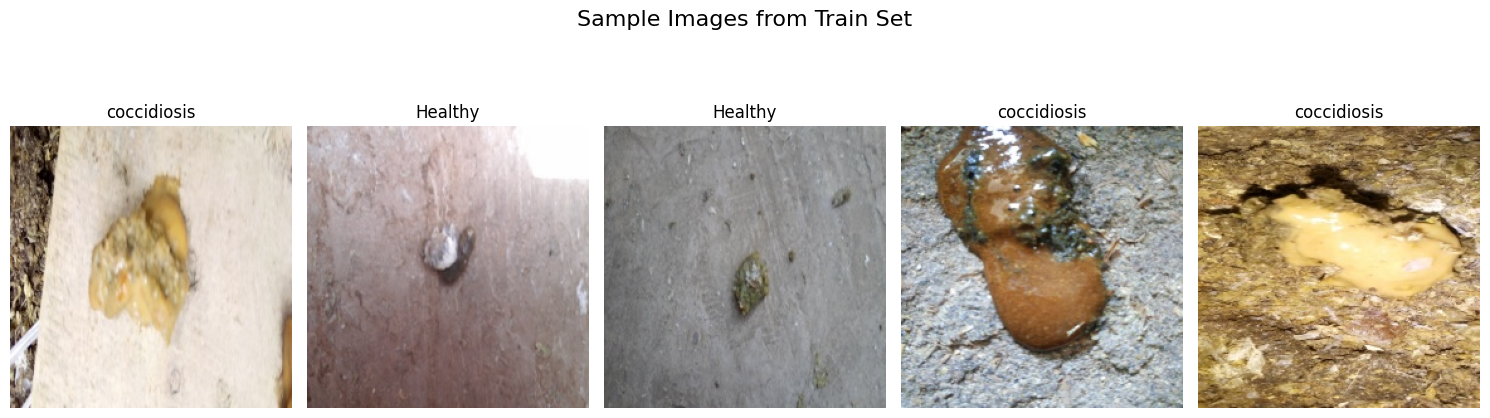

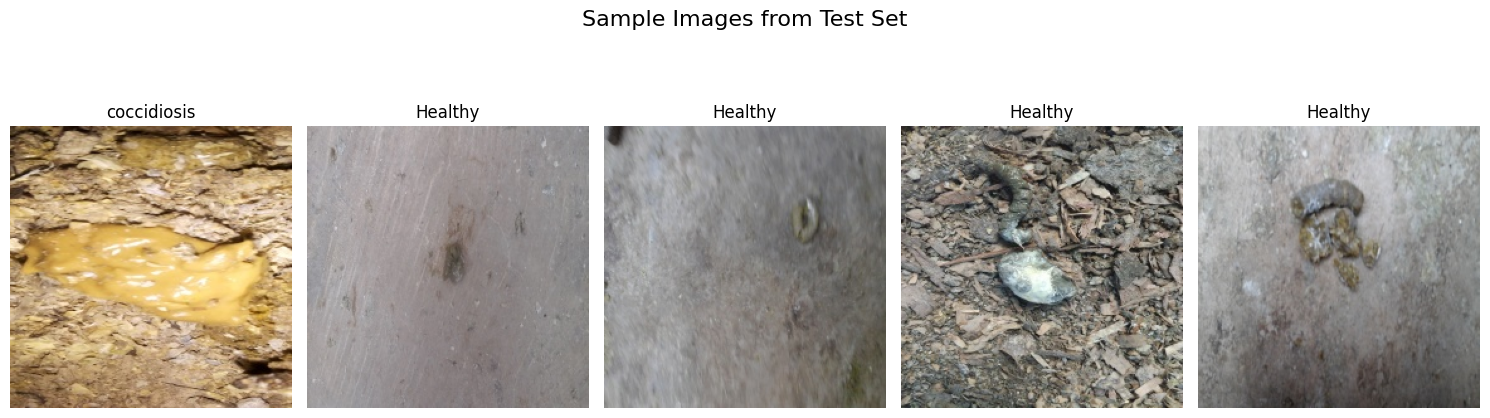

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# **Step 0: Display Random Images from Train and Test**
def display_random_images_from_dir(directory, title, num_images=5):
    import os, random
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    # Get all valid image paths from subdirectories
    image_paths = []
    for cls in os.listdir(directory):
        class_path = os.path.join(directory, cls)
        if os.path.isdir(class_path):
            imgs = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
            image_paths.extend(imgs)

    # Randomly pick up to `num_images` from the full list
    selected_imgs = random.sample(image_paths, min(num_images, len(image_paths)))

    # Plot
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(selected_imgs):
        img = mpimg.imread(img_path)
        plt.subplot(1, len(selected_imgs), i + 1)
        plt.imshow(img)
        plt.title(os.path.basename(os.path.dirname(img_path)))
        plt.axis('off')
    plt.suptitle(f"Sample Images from {title}", fontsize=16)
    plt.tight_layout()
    plt.show()


# Show images from train and test
display_random_images_from_dir('/kaggle/input/chicken-fecal-disease/chick_split/train', 'Train Set')
display_random_images_from_dir('/kaggle/input/chicken-fecal-disease/chick_split/test', 'Test Set')


2025-05-11 09:51:30.565197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746957090.755885      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746957090.809424      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 2440 files belonging to 2 classes.


I0000 00:00:1746957104.299610      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 2440 files belonging to 2 classes.
24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


I0000 00:00:1746957126.889696      98 service.cc:148] XLA service 0x7d7d5c113250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746957126.890583      98 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746957128.785036      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


 5/77 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8056 - loss: 0.4373

I0000 00:00:1746957138.677636      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.9410 - loss: 0.1580Epoch 1: Test Accuracy = 0.9787, Test Loss = 0.0638
77/77 ━━━━━━━━━━━━━━━━━━━━ 52s 312ms/step - accuracy: 0.9413 - loss: 0.1574
Epoch 2/10
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9849 - loss: 0.0466Epoch 2: Test Accuracy = 0.9828, Test Loss = 0.0537
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9850 - loss: 0.0467
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9924 - loss: 0.0282Epoch 3: Test Accuracy = 0.9787, Test Loss = 0.0597
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9924 - loss: 0.0283
Epoch 4/10
76/77 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9903 - loss: 0.0262Epoch 4: Test Accuracy = 0.9758, Test Loss = 0.0612
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9902 - loss: 0.0263
Epoch 5/10
75/77 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9900 - loss: 0.0313Epoch 5: Test Accuracy = 0.9779, Test Loss = 0.0648
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 44

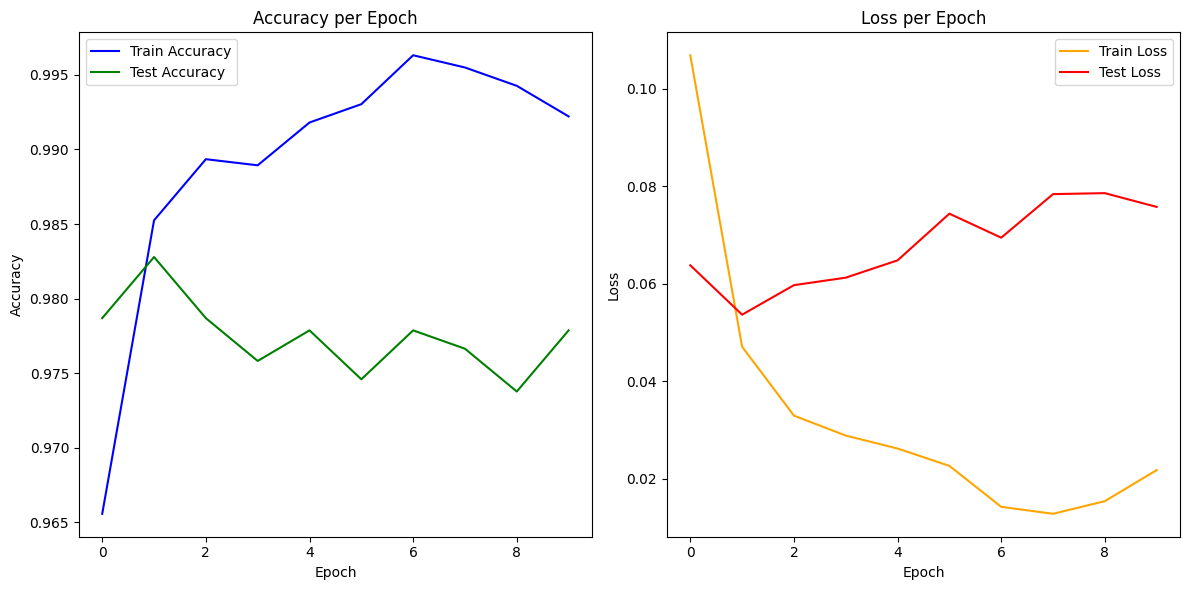

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 1: Load Datasets
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/chicken-fecal-disease/chick_split/train', 
    image_size=(224, 224), 
    batch_size=32, 
    label_mode='int'
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/chicken-fecal-disease/chick_split/test', 
    image_size=(224, 224), 
    batch_size=32, 
    label_mode='int'
)

# Step 2: Load Base Model
base_model = tf.keras.applications.EfficientNetV2B0(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)
base_model.trainable = False

# Step 3: Build Model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_data.class_names), activation='softmax')
])

# Step 4: Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Custom Callback to Track Test Accuracy and Loss
class TestMetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_accuracies = []
        self.test_losses = []

    def on_epoch_end(self, epoch, logs=None):
        loss, acc = self.model.evaluate(self.test_data, verbose=0)
        self.test_accuracies.append(acc)
        self.test_losses.append(loss)
        print(f"Epoch {epoch+1}: Test Accuracy = {acc:.4f}, Test Loss = {loss:.4f}")

test_metrics_callback = TestMetricsCallback(test_data)

# Step 6: Train Model
history = model.fit(train_data, epochs=10, callbacks=[test_metrics_callback])

# Step 7: Save Model
model.save('chicken_fecal_model.h5')

# Step 8: Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(test_metrics_callback.test_accuracies, label='Test Accuracy', color='green')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.plot(test_metrics_callback.test_losses, label='Test Loss', color='red')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


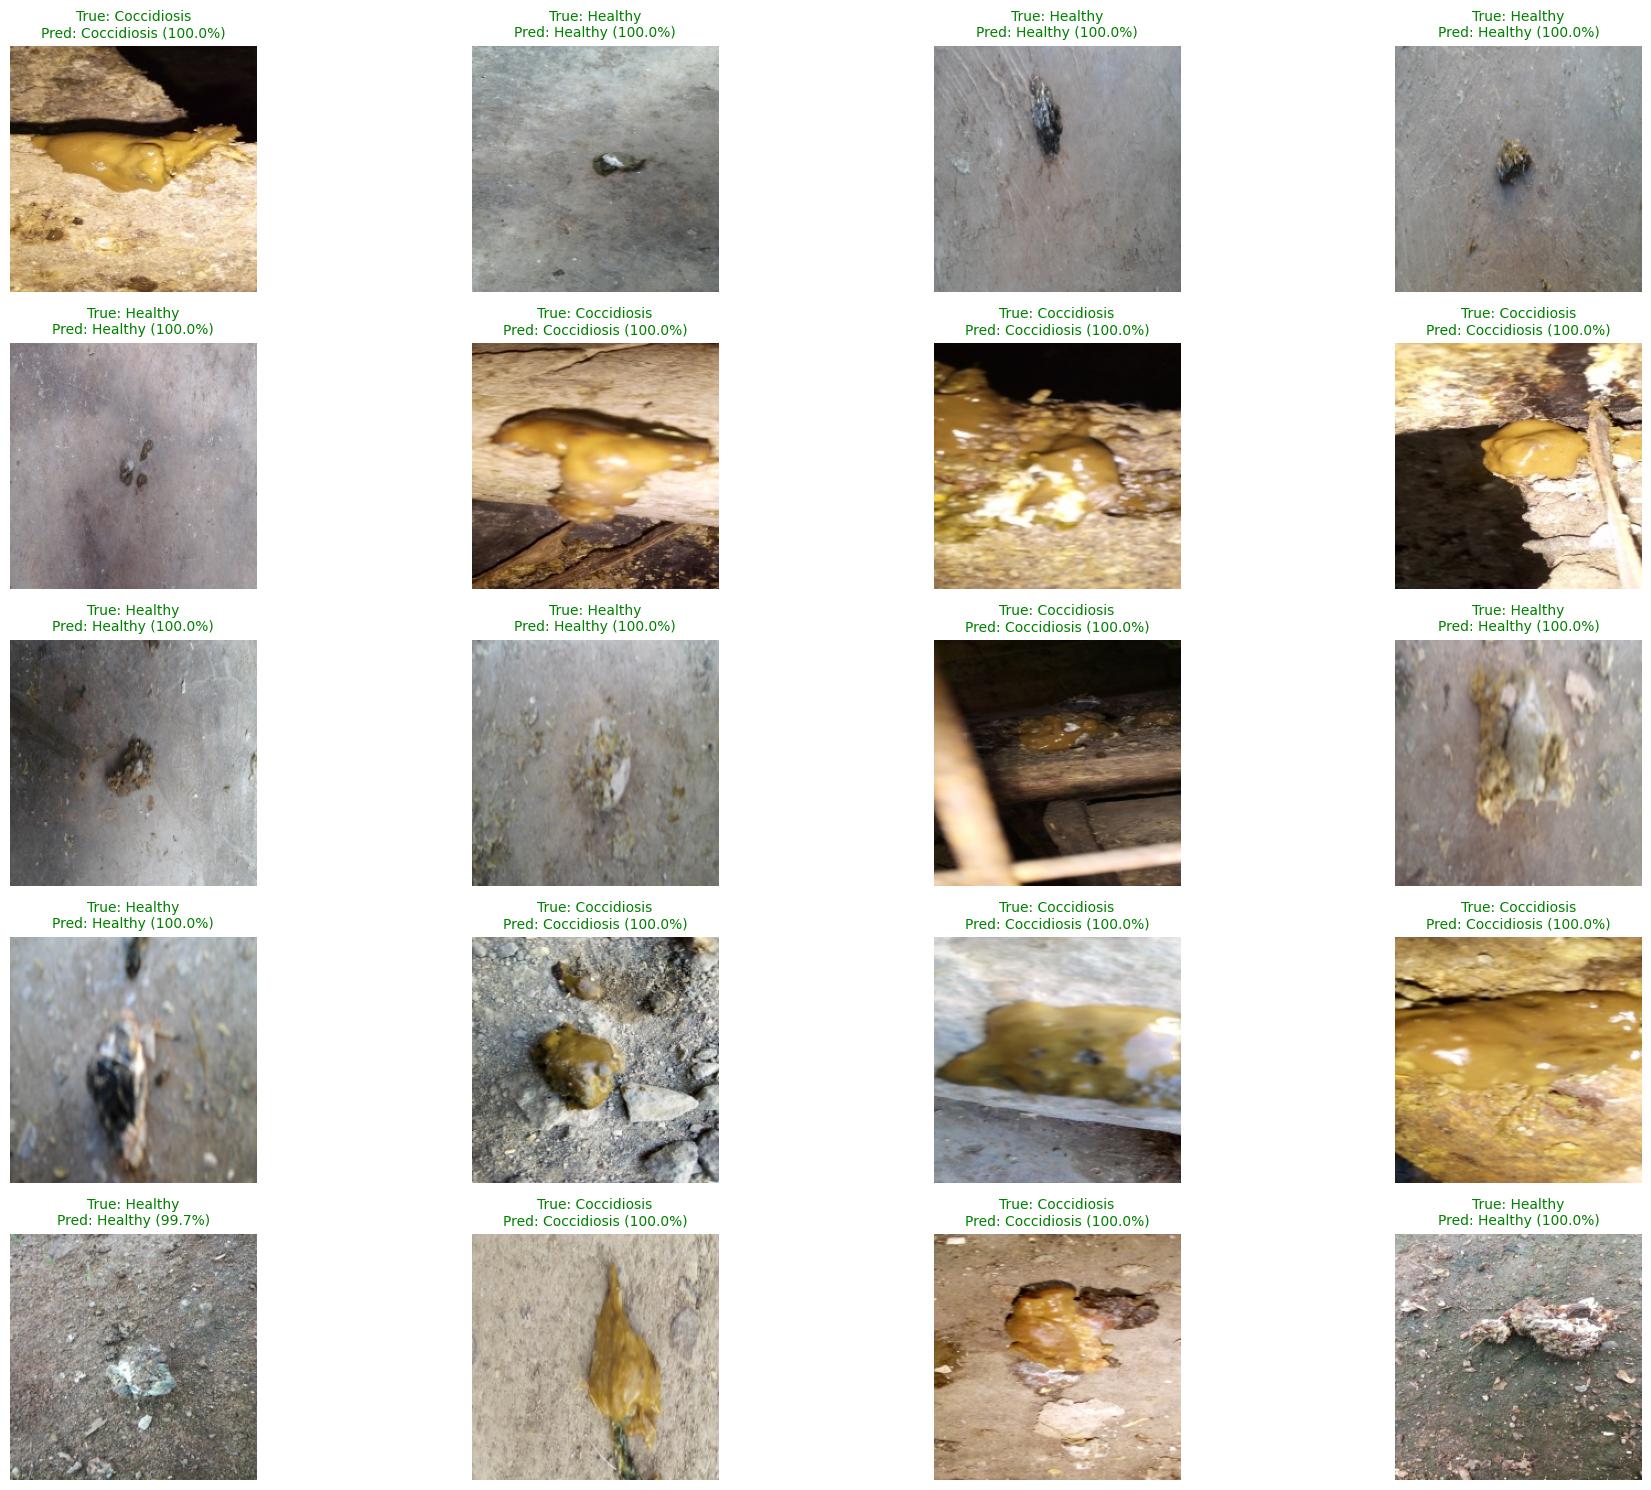


Correct Predictions: 20 / 20
Sample Accuracy: 100.00%


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# **Step 1: Load the saved model**
model = load_model('/kaggle/working/chicken_fecal_model.h5')

# **Step 2: Define the class names**
class_names = ['Healthy', 'Coccidiosis']  # Replace with your actual class names

# **Step 3: Define the test folder path**
test_folder = '/kaggle/input/chicken-fecal-images/Chicken-fecal-images'

# **Step 4: Collect 20 random image paths and their true labels**
image_paths = []
true_labels = []

for label_index, class_name in enumerate(os.listdir(test_folder)):
    class_path = os.path.join(test_folder, class_name)
    images_in_class = os.listdir(class_path)
    chosen_images = random.sample(images_in_class, k=min(10, len(images_in_class)))  # choose up to 10 per class
    for img_name in chosen_images:
        image_paths.append(os.path.join(class_path, img_name))
        true_labels.append(class_name)

# **Shuffle and pick 20 images**
combined = list(zip(image_paths, true_labels))
random.shuffle(combined)
combined = combined[:20]

# **Step 5: Make predictions and display results**
plt.figure(figsize=(20, 15))  # Wider figure for more space

correct = 0  # For accuracy count

for i, (img_path, true_label) in enumerate(combined):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = tf.keras.applications.efficientnet_v2.preprocess_input(img_array)  # Preprocess for EfficientNetV2
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(img_array, verbose=0)
    predicted_class_index = np.argmax(predictions)
    confidence = np.max(predictions) * 100
    predicted_label = class_names[predicted_class_index]

    # Determine color based on match
    is_correct = true_label.strip().lower() == predicted_label.strip().lower()
    color = 'green' if is_correct else 'red'
    if is_correct:
        correct += 1

    # Plot image
    plt.subplot(5, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {predicted_label} ({confidence:.1f}%)", fontsize=10, color=color)

plt.tight_layout()
plt.show()

# **Step 6: Print accuracy over the 20 samples**
accuracy = correct / len(combined) * 100
print(f"\nCorrect Predictions: {correct} / {len(combined)}")
print(f"Sample Accuracy: {accuracy:.2f}%")


Found 2440 files belonging to 2 classes.
Correct Predictions: 2429
Incorrect Predictions: 11
Accuracy on Training Data: 0.9955


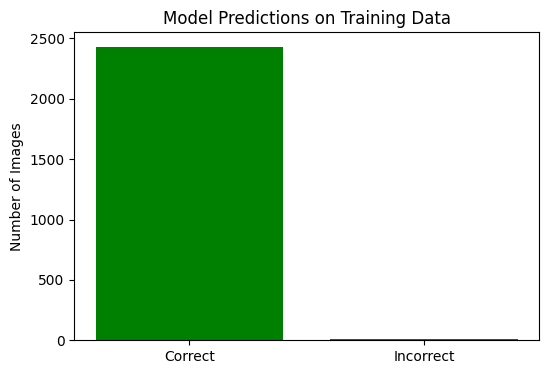

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# **Step 1: Load the trained model**
model = tf.keras.models.load_model('/kaggle/working/chicken_fecal_model.h5')

# **Step 2: Load the train dataset (shuffle=False for reproducibility)**
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/chicken-fecal-disease/chick_split/train',
    image_size=(224, 224),
    batch_size=1,  # One image at a time
    label_mode='int',
    shuffle=False  # Important to match labels with file order
)

class_names = train_data.class_names
total = 0
correct = 0

# **Step 3: Predict and compare with true labels**
for images, labels in train_data:
    preds = model.predict(images, verbose=0)
    predicted_label = np.argmax(preds[0])
    true_label = labels.numpy()[0]
    
    total += 1
    if predicted_label == true_label:
        correct += 1

incorrect = total - correct

# **Step 4: Print result**
print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")
print(f"Accuracy on Training Data: {correct / total:.4f}")

# **Step 5: Plot the result**
plt.figure(figsize=(6, 4))
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Model Predictions on Training Data')
plt.ylabel('Number of Images')
plt.show()


Found 2440 files belonging to 2 classes.
Correct Predictions: 2386
Incorrect Predictions: 54
Accuracy on Test Data: 0.9779


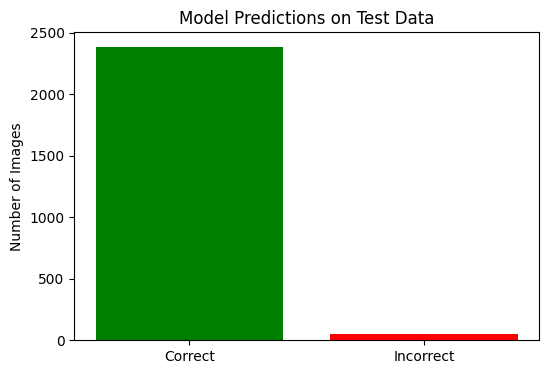

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# **Step 1: Load the trained model**
model = tf.keras.models.load_model('/kaggle/working/chicken_fecal_model.h5')

# **Step 2: Load the test dataset (shuffle=False for reproducibility)**
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/chicken-fecal-disease/chick_split/test',
    image_size=(224, 224),
    batch_size=1,  # One image at a time
    label_mode='int',
    shuffle=False  # Important to match labels with file order
)

class_names = test_data.class_names
total = 0
correct = 0

# **Step 3: Predict and compare with true labels**
for images, labels in test_data:
    preds = model.predict(images, verbose=0)
    predicted_label = np.argmax(preds[0])
    true_label = labels.numpy()[0]
    
    total += 1
    if predicted_label == true_label:
        correct += 1

incorrect = total - correct

# **Step 4: Print result**
print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")
print(f"Accuracy on Test Data: {correct / total:.4f}")

# **Step 5: Plot the result**
plt.figure(figsize=(6, 4))
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Model Predictions on Test Data')
plt.ylabel('Number of Images')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted class: Healthy


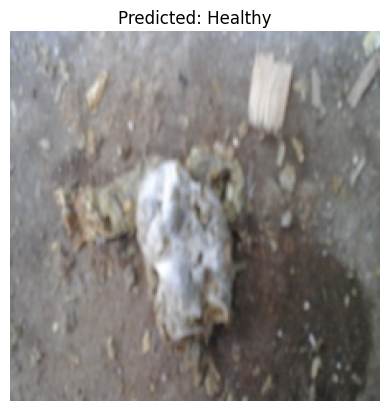

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# **Step 1: Load the trained model**
model = tf.keras.models.load_model('/kaggle/working/chicken_fecal_model.h5')  # Replace with your model path

# **Step 2: Load the new image (replace with your image path)**
img_path = '/kaggle/input/chicken-fecal-images/Chicken-fecal-images/Healthy/healthy.124.jpg'  # Update with the path to your image

# **Step 3: Preprocess the image**
img = image.load_img(img_path, target_size=(224, 224))  # Resize image to 224x224 for the model
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (required for model input)

# **Step 4: Make a prediction**
preds = model.predict(img_array)  # Predict the class for the image
predicted_label = np.argmax(preds[0])  # Get the predicted class (index with max probability)

# **Step 5: Print the prediction**
class_names = ['Healthy','coccidiosis']  # Replace with your class names
print(f"Predicted class: {class_names[predicted_label]}")

# **Step 6: Show the image**
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_label]}")
plt.axis('off')  # Turn off axes for a cleaner image display
plt.show()
